In [13]:
from utils import DQN, ReplayBuffer, greedy_action, epsilon_greedy, update_target, loss, loss_ddqn

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math
import numpy as np

import gym
import matplotlib.pyplot as plt
from multiprocessing.pool import ThreadPool

In [14]:
def trainning(run):
    env = gym.make('CartPole-v1')
    # Make sure to include appropriate labels and/or legends when presenting your plot
    layers = [4, 256, 256, 2]
    epsilon = 0.9
    learning_rate = 0.0001
    buffer_size = 10000
    batch_size = 256
    update_target_freq = 20

    NUM_RUNS = 10
    steps_done = 0

    episode_durations = []
    policy_net = DQN(layers)
    target_net = DQN(layers)
    update_target(target_net, policy_net)
    target_net.eval()
    EPS_START = epsilon
    EPS_END = 0.05
    EPS_DECAY = 50
    optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
    memory = ReplayBuffer(buffer_size)
    for i_episode in range(600):
        if (i_episode+1) % 50 == 0:
            print("episode ", i_episode+1, "/", 300)

        observation, info = env.reset()
        state = torch.tensor(observation).float()

        done = False
        terminated = False
        t = 0
        while not (done or terminated):

            # Select and perform an action
            epsilon_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
            action = epsilon_greedy(epsilon_threshold, policy_net, state)
            
            observation, reward, done, terminated, info = env.step(action)
            reward = torch.tensor([reward])
            action = torch.tensor([action])
            next_state = torch.tensor(observation).reshape(-1).float()

            memory.push([state, action, next_state, reward, torch.tensor([done])])

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            if not len(memory.buffer) < batch_size:
                transitions = memory.sample(batch_size)
                state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                # Compute loss
                mse_loss = loss_ddqn(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                # Optimize the model
                optimizer.zero_grad()
                mse_loss.backward()
                for param in policy_net.parameters():
                    param.grad.data.clamp_(-1, 1)
                optimizer.step()
            
            if done or terminated:
                episode_durations.append(t + 1)
            t += 1
        # Update the target network, copying all weights and biases in DQN
        steps_done += 1
        if i_episode % update_target_freq == 0: 
            update_target(target_net, policy_net)
    torch.save(policy_net.state_dict(), "model_DDQN_{}.pth".format(run))
    
    return episode_durations

In [15]:
# Visualising the greedy Q-values for a stationary cart in the middle of the track
# 2D plot showing policy as a function of pole angle and angular velocity (omega)

# This plots the policy and Q values according to the network currently
# stored in the variable "policy_net"

# All visualisations provided here are placeholders and you can modify these plots


# env = gym.make('CartPole-v1')

# print(f"Starting run {run+1} of {NUM_RUNS}")

runs_results = []

# multithread training
pool = ThreadPool(processes=10)
results = pool.map(trainning, range(10))
pool.close()
pool.join()
runs_results.append(results)


# runs_results.append(episode_durations)
#save the model



episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  50 / 300
episode  100 / 300
episode  100 / 300
episode  100 / 300
episode  150 / 300
episode  100 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  200 / 300
episode  250 / 300
episode  250 / 300
episode  100 / 300
episode  300 / 300
episode  300 / 300
episode  350 / 300
episode  350 / 300
episode  100 / 300
episode  400 / 300
episode  400 / 300
episode  100 / 300
episode  450 / 300
episode  450 / 300
episode  100 / 300
episode  100 / 300
episode  500 / 300
episode  500 / 300
episode  550 / 300
episode  550 / 300
episode  600 / 300
episode  600 / 300
episode  150 / 300
episode  150 / 300
episode  150 / 300
episode  150 / 300
episode  150 / 300
episode  150 / 300
episode  150 / 300
episode  200 / 300
episode  150 / 300
episode  200 / 300
episode  200 / 300
episode  200 / 300
episode  200 / 300
epi

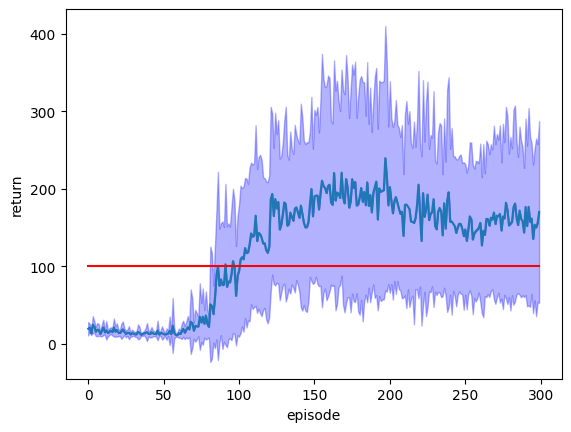

In [20]:
# Plot the results
res1 = torch.tensor(results)
means = res1.float().mean(0)[0:300]
stds = res1.float().std(0)[0:300]
plt.clf()
# plt.figure()
plt.plot(torch.arange(300), means)
plt.ylabel("return")
plt.xlabel("episode")
plt.fill_between(torch.arange(300), means, means + stds, alpha=0.3, color='b')
plt.fill_between(torch.arange(300), means, means - stds, alpha=0.3, color='b')
# baseline at 100
plt.plot(torch.arange(300), torch.ones(300)*100, color='r')

[[14,
  20,
  16,
  21,
  26,
  11,
  30,
  16,
  12,
  12,
  13,
  18,
  9,
  25,
  15,
  18,
  11,
  46,
  21,
  28,
  17,
  18,
  9,
  16,
  14,
  24,
  21,
  11,
  9,
  15,
  11,
  11,
  13,
  13,
  9,
  12,
  16,
  17,
  10,
  11,
  15,
  19,
  10,
  19,
  18,
  13,
  22,
  16,
  12,
  15,
  10,
  11,
  11,
  11,
  9,
  12,
  19,
  12,
  11,
  17,
  16,
  12,
  15,
  19,
  17,
  28,
  19,
  16,
  12,
  25,
  16,
  20,
  33,
  17,
  18,
  13,
  19,
  19,
  17,
  20,
  20,
  21,
  18,
  23,
  22,
  20,
  15,
  19,
  31,
  26,
  21,
  24,
  22,
  16,
  23,
  20,
  32,
  23,
  38,
  18,
  20,
  26,
  56,
  22,
  155,
  43,
  59,
  264,
  188,
  262,
  243,
  294,
  269,
  177,
  268,
  185,
  178,
  213,
  175,
  143,
  204,
  269,
  291,
  252,
  214,
  179,
  294,
  79,
  237,
  232,
  282,
  207,
  201,
  172,
  200,
  181,
  201,
  236,
  212,
  204,
  205,
  350,
  261,
  277,
  315,
  343,
  276,
  284,
  320,
  287,
  363,
  304,
  265,
  322,
  384,
  470,
  500,
  441,
  500,